<a href="https://colab.research.google.com/github/Ayon150/AI/blob/main/Mnist_even_odd_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Example labels before: [5 0 4 1 9 2 1 3 1 4]
✅ After conversion: [1 0 0 1 1 0 1 1 1 0]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 - 39s - 93ms/step - accuracy: 0.9504 - loss: 0.1293 - val_accuracy: 0.9827 - val_loss: 0.0488
Epoch 2/5
422/422 - 37s - 87ms/step - accuracy: 0.9830 - loss: 0.0492 - val_accuracy: 0.9885 - val_loss: 0.0326
Epoch 3/5
422/422 - 35s - 82ms/step - accuracy: 0.9878 - loss: 0.0354 - val_accuracy: 0.9902 - val_loss: 0.0299
Epoch 4/5
422/422 - 42s - 99ms/step - accuracy: 0.9906 - loss: 0.0290 - val_accuracy: 0.9925 - val_loss: 0.0275
Epoch 5/5
422/422 - 41s - 97ms/step - accuracy: 0.9919 - loss: 0.0230 - val_accuracy: 0.9927 - val_loss: 0.0236

✅ Test Accuracy: 99.41%


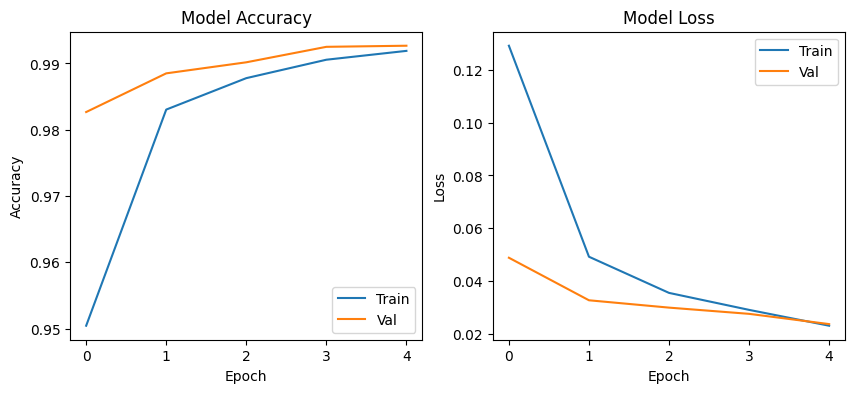

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


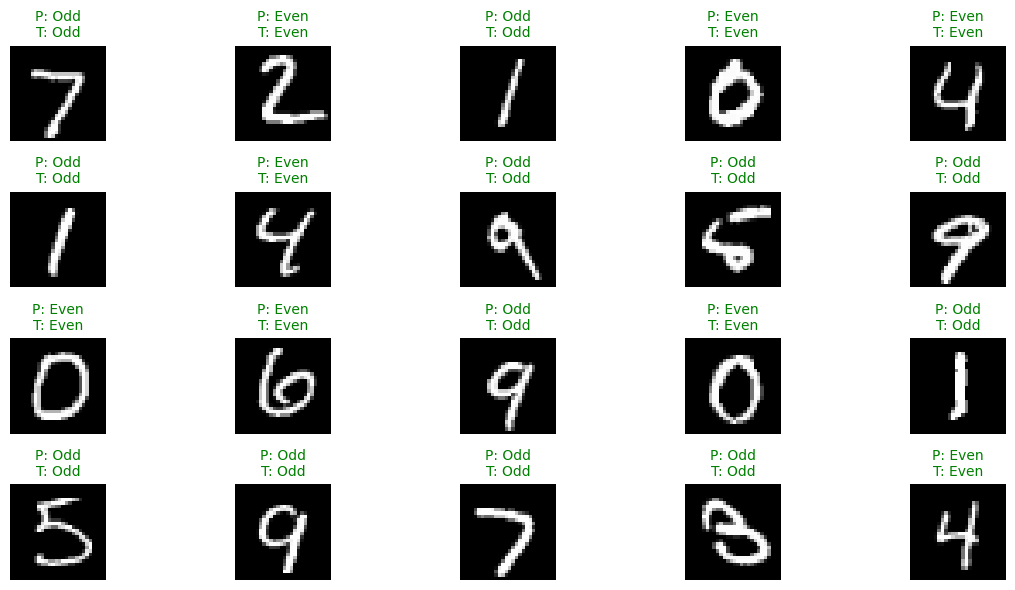

In [1]:
# ============================================
# 🧠 MNIST Binary Classification (Even vs Odd)
# ============================================

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# --- 1️⃣ Load MNIST Dataset ---
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# --- 2️⃣ Preprocessing ---
# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension for CNN input
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# --- 3️⃣ Convert Labels: Even = 0, Odd = 1 ---
y_train_binary = (y_train % 2 != 0).astype("int")
y_test_binary = (y_test % 2 != 0).astype("int")

print("✅ Example labels before:", y_train[:10])
print("✅ After conversion:", y_train_binary[:10])

# --- 4️⃣ Build CNN Model ---
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# --- 5️⃣ Train Model ---
history = model.fit(
    x_train, y_train_binary,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

# --- 6️⃣ Evaluate Model ---
loss, acc = model.evaluate(x_test, y_test_binary, verbose=0)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")

# --- 7️⃣ Plot Accuracy & Loss ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# --- 8️⃣ Predict on Test Data ---
pred_probs = model.predict(x_test)
pred_labels = (pred_probs > 0.5).astype("int").flatten()

# --- 9️⃣ Visualize 20 Predictions ---
plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    true_label = "Odd" if y_test_binary[i] == 1 else "Even"
    pred_label = "Odd" if pred_labels[i] == 1 else "Even"

    color = 'green' if y_test_binary[i] == pred_labels[i] else 'red'
    plt.title(f"P: {pred_label}\nT: {true_label}", color=color, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()
